**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Split of dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [3]:
import pandas as pd

#encoding of categorical variables with one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

#filling all the missing values with zeros
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [4]:
from sklearn.preprocessing import StandardScaler

#now for standardize the numerical features, we are going to consider only the numerical values

num_values = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

X[num_values] = scaler.fit_transform(X[num_values])


<ipython-input-4-b35bbd0d2b59>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_values] = scaler.fit_transform(X[num_values])


In [5]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.718306,0.653650
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.487269,-0.895552
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.418744,1.170051
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.718306,-0.895552
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.718306,-0.895552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-2.251775,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,0.649113,-0.718306,1.170051
299,1.502821,0.686202,0.877985,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,0.649113,1.418744,1.170051
300,0.283813,0.686202,0.877985,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,0.649113,0.350219,1.170051
301,0.283813,-1.457296,-1.208521,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,0.649113,0.350219,-0.895552


# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [6]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
xgb_model = XGBClassifier(random_state=42)
label_encoder= LabelEncoder()

In [8]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [10]:
preds = xgb_model.predict(X_test)
accuracy_score(y_test, preds)

0.47540983606557374

# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [11]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.1,0.2]
}

grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,y_train)
print("Best Hyperparameters:", grid_search.best_params_)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [12]:
#Now use the best hyperparameters

new_xgb_model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100)

new_xgb_model.fit(X_train,y_train)

y_pred = new_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy", accuracy)


Accuracy 0.5245901639344263


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

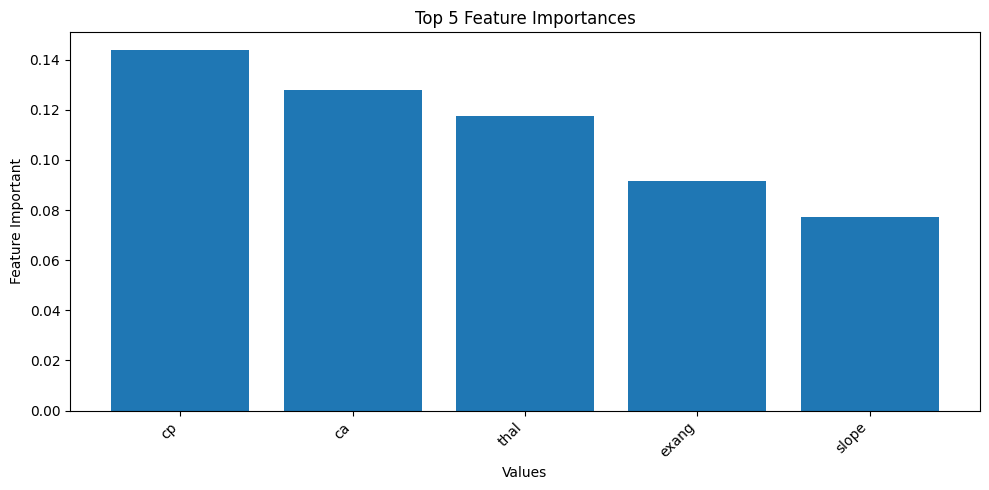

   Features  Importance
2        cp    0.143746
11       ca    0.127940
12     thal    0.117600
8     exang    0.091739
10    slope    0.077090


In [13]:
import matplotlib.pyplot as plt

feature_important = new_xgb_model.feature_importances_

values = X_train.columns

idx = feature_important.argsort()[::-1]

#To display the plot
top_feat = 5
plt.figure(figsize=(10, 5))
plt.bar(range(top_feat), feature_important[idx][:top_feat], align="center")
plt.xticks(range(top_feat), values[idx][:top_feat], rotation=45, ha="right")
plt.xlabel("Values")
plt.ylabel("Feature Important")
plt.title("Top {} Feature Importances".format(top_feat))
plt.tight_layout()
plt.show()



#To display the importance of the top 5 features


feature_important_df = pd.DataFrame({'Features': values, 'Importance': feature_important})
feature_important_df = feature_important_df.sort_values(by='Importance', ascending=False)

top_5 = feature_important_df.head(top_feat)
print(top_5)

# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

In [14]:
#to compare the basic xgb model and the new, we can reuse the variables xgb_model and new_xgb_model
#we can also use "preds" used for xgb_model and y_pred for new_xgb_model

#computation of accuracy, precision, recall and f1_score for the basic model with basic hyperparameters
basic_accuracy = accuracy_score(y_test, preds)
basic_precision = precision_score(y_test, preds, average='weighted')
basic_recall = recall_score(y_test, preds, average='weighted')
basic_f1_score = f1_score(y_test, preds, average='weighted')

#computation of accuracy, precision, recall and f1_score for the new model with optimal hyperparameters

new_accuracy = accuracy_score(y_test, y_pred)
new_precision = precision_score(y_test, y_pred, average='weighted')
new_recall = recall_score(y_test, y_pred, average='weighted')
new_f1_score = f1_score(y_test, y_pred, average='weighted')


print("=====================================")
print("Basic XGB Model:")
print(f'Accuracy: + {basic_accuracy}')
print(f'Precision: + {basic_precision}')
print(f'Recall: + {basic_recall}')
print(f'F1_Score: + {basic_f1_score}')
print("=====================================")
print("New XGB Model:")
print(f'Accuracy: + {new_accuracy}')
print(f'Precision: + {new_precision}')
print(f'Recall: + {new_recall}')
print(f'F1_Score: + {new_f1_score}')
print("=====================================")

Basic XGB Model:
Accuracy: + 0.47540983606557374
Precision: + 0.4074011571841851
Recall: + 0.47540983606557374
F1_Score: + 0.4387635756056809
New XGB Model:
Accuracy: + 0.5245901639344263
Precision: + 0.4495316159250586
Recall: + 0.5245901639344263
F1_Score: + 0.48246153293068744


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


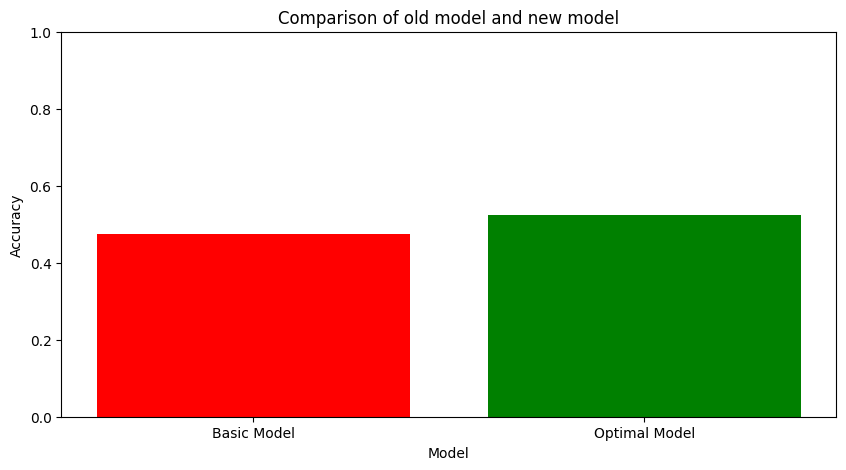

In [15]:

plt_names = ["Basic Model", "Optimal Model"]
accuracy_values = [basic_accuracy, new_accuracy]
plt.figure(figsize=(10,5))
plt.bar(plt_names, accuracy_values, color=['red', 'green'])
plt.ylim(0,1)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of old model and new model")
plt.show()

The use of optimal hyperparameters will improve the resoults of the model, other than accuracy, we can notice that the improvement is also shown for precision, recall and f1_score.